In [1]:

# ------------------------------------------------------------------------------------------------------------------------------------------
# MÀSTER EN CIÈNCIA DE DADES DE LA UOC
# ASSIGNATURA: VISUALITZACIÓ DE DADES
# ------------------------------------------------------------------------------------------------------------------------------------------
# ALUMNE: Nicolás González Soler
# ------------------------------------------------------------------------------------------------------------------------------------------
# PAC2: Tres tècniques de visualització de dades
# Data lliurament: 22/04/2024
# EXERCICI: exemple d'una visualització realitzada emprant la tècnica de WORD CLOUD / TAG CLOUD
# ------------------------------------------------------------------------------------------------------------------------------------------
# ORIGEN DE LES DADES: https://www.kaggle.com/datasets/mmaguero/covid19-spanishtweets-earlylateapril2020
# NOM DEL FITXER: word_freq-1gram_ES.csv
# ------------------------------------------------------------------------------------------------------------------------------------------



Informació general del dataset:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44566 entries, 0 to 44565
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       44566 non-null  object
 1   frequency  44566 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 696.5+ KB
None

Primeres files del dataset:
--------------------------------------------------
                       word  frequency
0             quedateencasa       2131
1           yomequedoencasa       2031
2                    gracia       1786
3             confinamiento       1563
4  estevirusloparamosunidos       1430



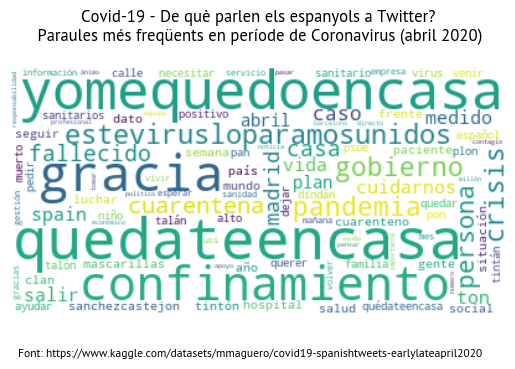

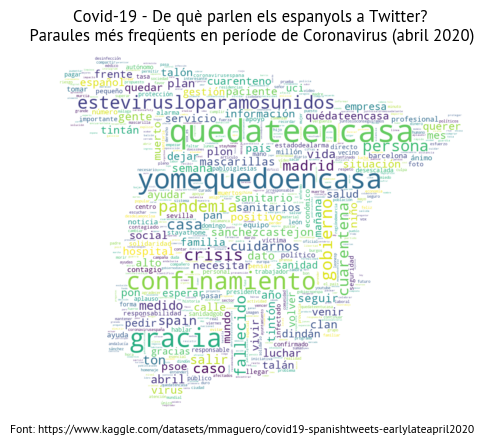

In [2]:
# Biblioteques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

# Càrrega del fitxer de dades
df = pd.read_csv("word_freq-1gram_ES.csv", header=None, names= ['word', 'frequency'])

# Informació general
print(f"\nInformació general del dataset:\n{'-'*50}")
print(df.info())

# Pimeres files del dataframe
print(f"\nPrimeres files del dataset:\n{'-'*50}")
print(df.head(5))
print()

# Creació del diccionary dades (paraula-freqüència) a partir del dataframe
dictionary = {}
for word, frequency in df.values:
    dictionary[word] = frequency

# Títol i peu de les visualitzaciosn
title="Covid-19 - De què parlen els espanyols a Twitter?\n Paraules més freqüents en període de Coronavirus (abril 2020)"
footnote="Font: https://www.kaggle.com/datasets/mmaguero/covid19-spanishtweets-earlylateapril2020"

# Instanciació de l'objecte Wordcloud i generació a partir del diccionari de dades (sense màscara)
wordcloud = WordCloud(background_color="white", max_words=1000, mask=None, mode="RGBA")
wordcloud.generate_from_frequencies(dictionary)

# Visualització SENSE màscara
fig = plt.figure()
plt.title(f"{title}\n", fontweight="normal", family="PT Sans")
fig.text(0.50, 0.15, footnote, horizontalalignment='center', wrap=True, family="PT Sans", fontsize="small")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Emmagatzemament en disc
fig.savefig("Wordcloud_estandard", dpi=fig.dpi)

# Instanciació de l'objecte Wordcloud i generació a partir del diccionari de dades (amb màscara)
mask = np.array(Image.open("spain.png"))
wordcloud = WordCloud(background_color="white", max_words=1000, mask=mask, mode="RGBA")
wordcloud.generate_from_frequencies(dictionary)

# Visualització AMB màscara
fig = plt.figure()
plt.title(title, fontweight="normal", family="PT Sans")
fig.text(0.50, 0.08, footnote, horizontalalignment='center', wrap=True, family="PT Sans", fontsize="small")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Emmagatzemament en disc
fig.savefig("Wordcloud_emmascarat", dpi=fig.dpi)